<a href="https://colab.research.google.com/github/binit24/Datascience-projects/blob/main/SDSS_Dataset_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [452]:
#Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import warnings:
import warnings
warnings.filterwarnings('ignore')

In [453]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [454]:
f = open("spacedata.csv")

In [455]:
#Reading the Dataset:
df = pd.read_csv('spacedata.csv')
print(df.shape) #checking no of rows and columns in the dataset.
df.head()

(10000, 18)


,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [456]:
#Checking datatypes:
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [457]:
#Checking for categorical columns:
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
print("Categorical Columns:",cat_col)

Categorical Columns: ['class']


In [458]:
#Checking the value count and unique value of each categorical feature:
for col in df.columns:
    if df[col].dtypes == object:
        print(str(col)+':'+str(df[col].unique()))
        print(df[col].value_counts())
        print('********************************************')

class:['STAR' 'GALAXY' 'QSO']
GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64
********************************************


           Total Missing Value
objid                        0
ra                           0
dec                          0
u                            0
g                            0
r                            0
i                            0
z                            0
run                          0
rerun                        0
camcol                       0
field                        0
specobjid                    0
class                        0
redshift                     0
plate                        0
mjd                          0
fiberid                      0


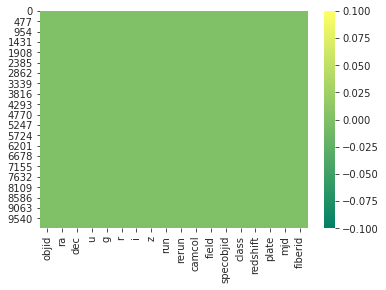

In [459]:
#Checking the null values in the dataset:
missing_value = pd.DataFrame(df.isnull().sum(),columns=['Total Missing Value'])
print(missing_value)
sns.heatmap(df.isnull(),cmap='summer')

In [460]:
#Dropping the unnecessary and useless columns:
df = df.drop(['objid','rerun','specobjid','fiberid'], axis=1)

In [461]:
#checking the Columns:
columns = list(df.columns)
print(df.shape)
print(columns)

(10000, 14)
['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field', 'class', 'redshift', 'plate', 'mjd']


In [462]:
#Doing Statistical Analysis by using Describe Function
#Checking interquantile range.
#Checking mean median mode
df.describe()

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,3.648700,302.380100,0.143726,1460.986400,52943.533300
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,1.666183,162.577763,0.388774,1788.778371,1511.150651
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,1.000000,11.000000,-0.004136,266.000000,51578.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,2.000000,184.000000,0.000081,301.000000,51900.000000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,4.000000,299.000000,0.042591,441.000000,51997.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,5.000000,414.000000,0.092579,2559.000000,54468.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,6.000000,768.000000,5.353854,8410.000000,57481.000000


In [463]:
#There is possibility of presence of outliers as mean of some features are greater than median.
#In some of features theres an huge difference between 75% and max which confirm the presence of outl

In [464]:
#Exploratory Data Analysis

#Univarite Analysis

#Multivariate Analysis

#Bivariate Analysis

#Here we check the relationship between different independant and dependant variable.

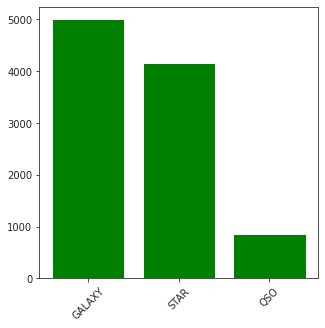

In [465]:
#Checking the value count and unique value of each categorical feature:
df['class'].value_counts()[:5]
plt.figure(figsize=(5,5))
plt.bar(list(df['class'].value_counts()[:5].keys()),list(df['class'].value_counts()[:5]),color='green')
plt.xticks(rotation=45)
plt.show()

Total no of stars:4998
Total no of galaxy:4152
Total no of qso:850


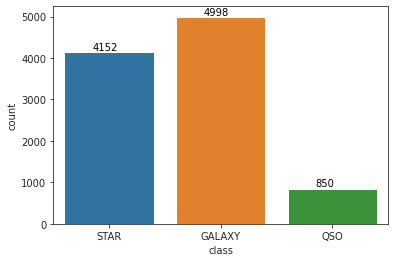

In [466]:
#Univariate Analysis:
#Checking Count of Target Varibale:
sns.set_style('ticks')
ax = sns.countplot(df['class'])
star, galaxy, qso = df['class'].value_counts()
print("Total no of stars:{}".format(star))
print("Total no of galaxy:{}".format(galaxy))
print("Total no of qso:{}".format(qso))
for p in ax.patches:
       ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

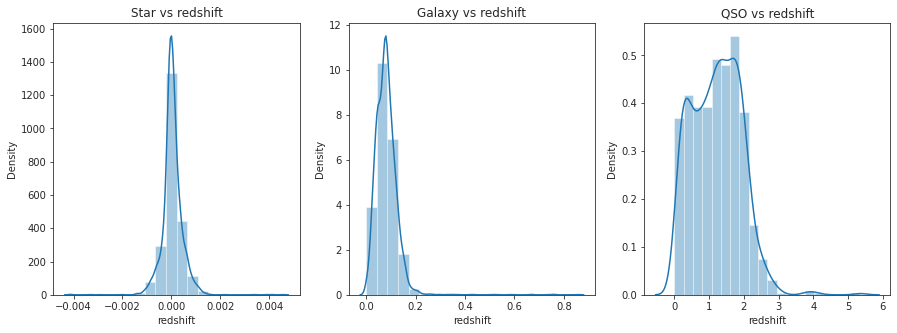

In [467]:
#Univarite Analysis checking the distribution of class variable respective to redshift:
#In physics, redshift happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum.
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))
ax = sns.distplot(df[df['class']=='STAR']['redshift'], bins = 20, ax = axes[0], kde = True)
ax.set_title('Star vs redshift')
ax = sns.distplot(df[df['class']=='GALAXY']['redshift'], bins = 20, ax = axes[1], kde = True)
ax.set_title('Galaxy vs redshift')
ax = sns.distplot(df[df['class']=='QSO']['redshift'], bins = 20, ax = axes[2], kde = True)
ax = ax.set_title('QSO vs redshift')

In [468]:
#Here we can observe the redshif for stars are somehow normally distributed.
#redshift for Galaxy and QSO are somehow positive skewed / right skewed.

In [469]:
#objid = Object Identifier
#ra = J2000 Right Ascension (r-band)
#dec = J2000 Declination (r-band)

In [470]:
#Right ascension (abbreviated RA) is the angular distance measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above 
#the earth in question. When paired with declination (abbreviated dec), these astronomical coordinates specify the direction of a point on the celestial sphere (traditionally called in English the skies or the sky) in the equatorial coordinate system.

class,GALAXY,QSO,STAR
dec,,,
-5.382632,0.0,0.0,1.0
-5.378794,1.0,0.0,0.0
-5.371988,1.0,0.0,0.0
-5.354572,1.0,0.0,0.0
-5.349621,1.0,0.0,0.0


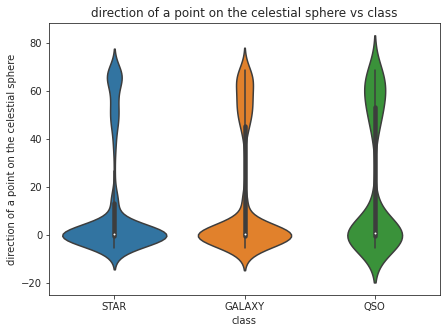

In [471]:
#Bivariate Analysis:
#Checking relationship between dec and class:
plt.figure(figsize=(7,5))
sns.violinplot(x='class',y='dec',data=df)
plt.xlabel('class')
plt.ylabel('direction of a point on the celestial sphere')
plt.title('direction of a point on the celestial sphere vs class')
pd.crosstab(index=df['dec'],columns=df['class'],normalize='index').head()

class,GALAXY,QSO,STAR
ra,,,
8.235100,0.0,0.0,1.0
8.245963,0.0,0.0,1.0
8.291367,1.0,0.0,0.0
8.386869,0.0,0.0,1.0
8.487886,0.0,0.0,1.0


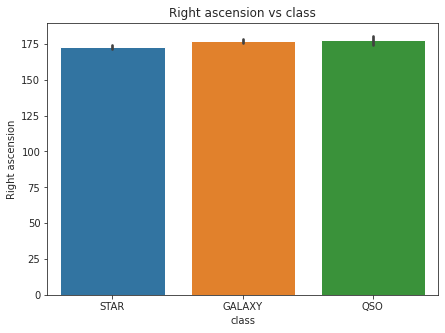

In [472]:
#Bivariate Analysis:
#Checking relationship between Right ascension and class:
plt.figure(figsize=(7,5))
sns.barplot(x='class',y='ra',data=df)
plt.xlabel('class')
plt.ylabel('Right ascension')
plt.title('Right ascension vs class')
pd.crosstab(index=df['ra'],columns=df['class'],normalize='index').head()

In [473]:
#using Label Encoder to convert Categorical data into neumeric:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns = ["class"]
for col in columns:
    df[col] = le.fit_transform(df[col])

In [474]:
#Checking for outliers
#outlier is a data point that differs significantly from other observations. 
#Any datapoint greater than +3 Standard Deviations and -3 SD are called Outliers
#Zscore is Automated method used to handle outliers.
#Let check wheather any outliers are present or not and if yes lets normalize them:
from scipy.stats import zscore
zscore = abs(zscore(df))
print("Before removal of outliers:",df.shape)
df_final = df.loc[(zscore<3).all(axis=1)]
print("After removal of outliers:",df_final.shape)

Before removal of outliers: (10000, 14)
After removal of outliers: (8713, 14)


In [475]:
#Checking for skewness:
#whether the features are right or left skewed.
#for right and left skewed we can use logarthim transformation.
#if the skewness value is greater than o.55 then the features are skewed.
df_final.skew()

ra         -0.131080
dec         1.214165
u          -0.982213
g          -0.528614
r          -0.151366
i           0.059073
z           0.170787
run         0.517015
camcol     -0.143107
field       0.220889
class       0.289700
redshift    4.949300
plate       1.315894
mjd         0.959917
dtype: float64

In [476]:
import scipy.stats as stat
import pylab

In [477]:
#If you want to check whether feature is guassian or normal distributed
# Q-Q plot is used to check wheather the data are normally distributed or not by graphically.
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df_final[feature],dist='norm',plot=pylab)
    plt.show()

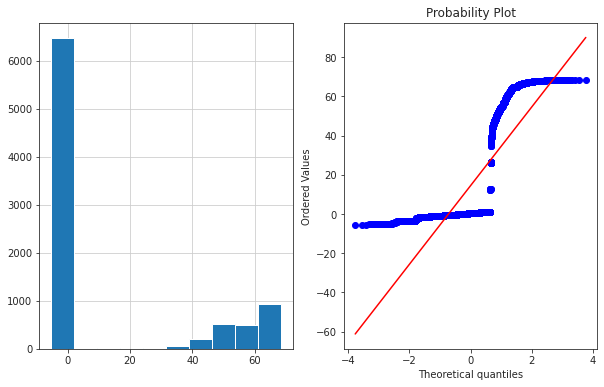

In [478]:
#checking distribution for dec:
plot_data(df_final,'dec')

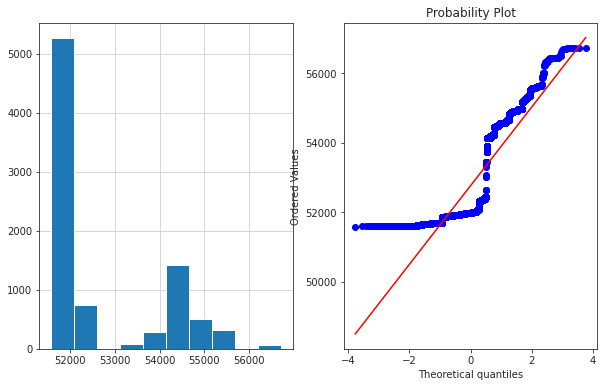

In [479]:
#checking distribution for mjd:
plot_data(df_final,'mjd')

In [480]:
#We can clearly see data points are not been normally distributed.
#All of them are right skewed.
#for skewed data logarthim transformation will work fine.
for col in df_final.columns:
    if col!= 'class':
        if df.skew().loc[col]>0.55:
            df[col] = np.log1p(df[col])

In [481]:
#Let Separate the input and output variable:
#Let select input and output value:
X = df_final.drop('class',axis=1)
y = df_final['class']
print('shape of X is {}'.format(X.shape))
print('shape of y is {}'.format(y.shape))

shape of X is (8713, 13)
shape of y is (8713,)


In [482]:
#Using StandardScaler to Preprocess the data:
#StandardScaler is used to bring the datapoints to standard normal distribution where mean = 0 and SD(+-)1:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

In [483]:
#Breaking the model into training and testing split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [484]:
#Lets check for corelation again and remove highly corelated feature as discussed above:
#Checking the coerelation:
#how the different neumerical features are corelated to each other 
#Their strength of relationship
#Their influence on target variable
corrmat = X_train.corr()

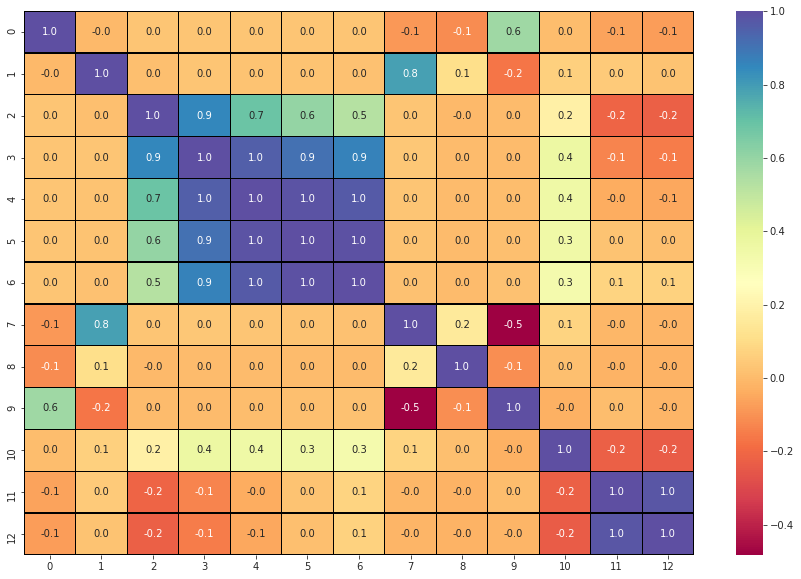

In [485]:
f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(corrmat,annot=True,fmt=".1f",linewidths=.2,cmap="Spectral",ax=ax,linecolor="black")
plt.show()

In [486]:
#Here we can see that some of the features are highly corealted with each hence these both feature will act as same.
#u , g , r, i, z represent the response of the 5 bands of the telescope and we can see they are highly corealated with each other.
# so as these features are highly corelated with each other they can behave as duplicate feature.

Text(0.5, 1.0, 'corelation with target variable')

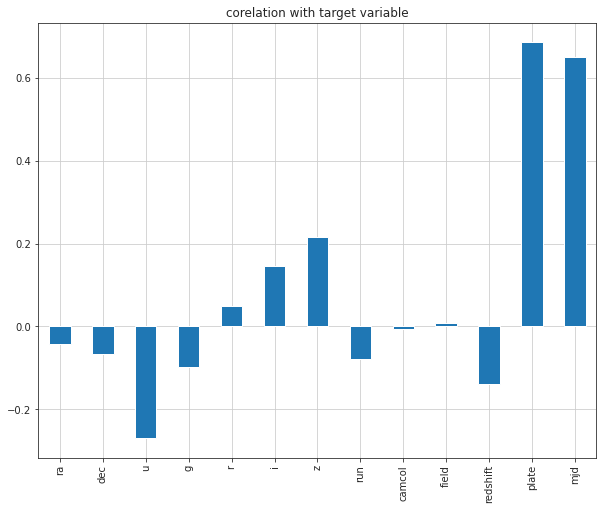

In [487]:
#corelation with target column:
plt.figure(figsize=(10,8))
df.drop('class',axis=1).corrwith(df['class']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title('corelation with target variable')

In [488]:
#Lets define a function and set a minimum threshold value to tackle the highly corelated feature:
def get_corelations(data, threshold):
    corr_col = set()  
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j]) > threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

In [489]:
corr_features = get_corelations(X_train, 0.85)
len(set(corr_features))

5

In [490]:
#Dropping the highly corelated columns:
X_train_uncorr = X_train.drop(labels=corr_features,axis=1)
X_test_uncorr = X_test.drop(labels=corr_features,axis=1)

In [491]:
X_train_uncorr.shape, X_test_uncorr.shape

((6970, 8), (1743, 8))

In [496]:
#As we know that output of the model is imbalance Dataset so we have to balance it:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

print("Attrition Rate in X_train dataset: ", X_train_uncorr.shape)
print("Attrition Rate in y_train dataset: ", y_train.shape)
print("Attrition Rate in X_test dataset: ", X_test_uncorr.shape)
print("Attrition Rate in y_test dataset: ", y_test.shape)

Attrition Rate in X_train dataset:  (6970, 8)
Attrition Rate in y_train dataset:  (6970,)
Attrition Rate in X_test dataset:  (1743, 8)
Attrition Rate in y_test dataset:  (1743,)


In [497]:
#Synthetic Minority Oversampling Technique
sm = SMOTE("minority")
X_train_uncorr_res, y_train_res = sm.fit_sample(X_train_uncorr, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_uncorr_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After OverSampling, the shape of train_X: (10464, 8)
After OverSampling, the shape of train_y: (10464,) 



In [498]:
#Importing Models for Predictions:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [500]:
model = [LogisticRegression(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]
for m in model:
    m.fit(X_train_uncorr_res,y_train_res)
    print("Score of",m, "is:",m.score(X_train_uncorr_res,y_train_res))
    y_predict= m.predict(X_test_uncorr)
    print("accuracy_score:",accuracy_score(y_test,y_predict))
    score = cross_val_score(m,X_train_uncorr_res,y_train_res,cv=5,scoring='accuracy').mean()
    print("Cross validation is",np.mean(score)*100)
    print(confusion_matrix(y_test,y_predict))
    print(classification_report(y_test,y_predict))
    print(confusion_matrix(y_test,y_predict))
    print('******************************************************************')
    print('\n')

Score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is: 0.9610091743119266
accuracy_score: 0.9822145725760184
Cross validation is 96.06267454384506
[[921  12  12]
 [  7  70   0]
 [  0   0 721]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       945
           1       0.85      0.91      0.88        77
           2       0.98      1.00      0.99       721

    accuracy                           0.98      1743
   macro avg       0.94      0.96      0.95      1743
weighted avg       0.98      0.98      0.98      1743

[[921  12  12]
 [  7  70   0]
 [  0   0 721]]
******************************************************************


Score of SVC(C=1.0, break_t

In [ ]:
#It looks like the All Regression has a good F1 score on the test set, but keep in mind this is just a single training/test split; we need to confirm this performance holds for other splits. In addition, we need to tune the regularization hyperparameter. 
#Fortunately, there's a way to tackle both at the same time without introducing additional bias

In [501]:
#Implementing Algorithim
model = LogisticRegression()
model.fit(X_train_uncorr_res,y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [504]:
#Lets perform Hyperparametre Tuning:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
param_grid = {'C': np.logspace(-3, 3, 10),'penalty':['l2','l1']}  
grid_search = GridSearchCV(estimator=model,param_grid=param_grid,cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42),scoring='accuracy',verbose=0,n_jobs=-1)

In [505]:
grid_search.fit(X_train_uncorr_res,y_train_res)
grid_search.best_params_

{'C': 1000.0, 'penalty': 'l2'}

In [506]:
#Getting best Score:
print(grid_search.best_score_)

0.9651218346870521


accuracy_score: 0.985083189902467
[[926  13   6]
 [  7  70   0]
 [  0   0 721]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       945
           1       0.84      0.91      0.88        77
           2       0.99      1.00      1.00       721

    accuracy                           0.99      1743
   macro avg       0.94      0.96      0.95      1743
weighted avg       0.99      0.99      0.99      1743



Text(0.5, 15.0, 'Predicted label')

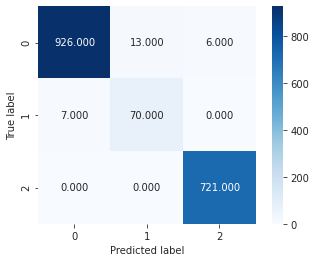

In [508]:
model = LogisticRegression(C=1000.0,penalty='l2')
model.fit(X_train_uncorr_res,y_train_res)
y_predict= model.predict(X_test_uncorr)
print("accuracy_score:",accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, annot_kws={"size":10}, cmap='Blues', square=True, fmt='.3f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [524]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print("Precision Score : ",precision_score(y_test, y_predict, pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_test, y_predict, pos_label='positive',average='micro'))

Precision Score :  0.985083189902467
Recall Score :  0.985083189902467


In [515]:
#AUC and ROC Curve:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob = model.predict_proba(X_test_uncorr)

auc_score = roc_auc_score(y_test,y_pred_prob,multi_class='ovr')
print("Auc and Roc Score for model is:",auc_score)

Auc and Roc Score for model is: 0.9958124251129328


In [526]:
#Saving the best Model:
import joblib
joblib.dump(model,'model.obj')
model_from_joblib = joblib.load('model.obj')
model_from_joblib.predict(X_test_uncorr)

array([0, 0, 0, ..., 0, 2, 0])